In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 - generated quantities

In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

F = len("Katarzyna")
L = len("Slominska")

samples = gen_quant.sample(data={'M':F}, 
fixed_param=True, 
iter_sampling=1000, 
iter_warmup=0, 
chains = 1)

df = samples.draws_pd()
df


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7],y_sim[8],y_sim[9]
0,0.0,0.0,12.90380,16.0,23.0,17.0,13.0,10.0,10.0,15.0,10.0,10.0
1,0.0,0.0,18.04360,21.0,17.0,18.0,22.0,17.0,13.0,19.0,20.0,20.0
2,0.0,0.0,32.86540,29.0,35.0,27.0,24.0,32.0,37.0,40.0,32.0,32.0
3,0.0,0.0,118.68900,123.0,129.0,122.0,104.0,122.0,121.0,117.0,136.0,116.0
4,0.0,0.0,220.85100,212.0,216.0,220.0,222.0,214.0,214.0,231.0,223.0,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,6.92919,5.0,9.0,4.0,7.0,9.0,7.0,11.0,4.0,10.0
996,0.0,0.0,44.35330,39.0,49.0,41.0,44.0,45.0,45.0,52.0,41.0,48.0
997,0.0,0.0,17.80550,14.0,20.0,19.0,9.0,29.0,18.0,13.0,27.0,26.0
998,0.0,0.0,128.71500,126.0,134.0,118.0,152.0,128.0,138.0,126.0,113.0,113.0


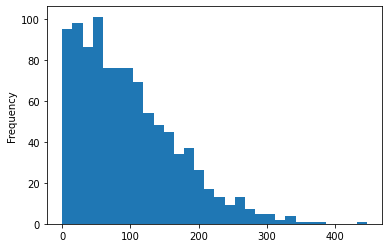

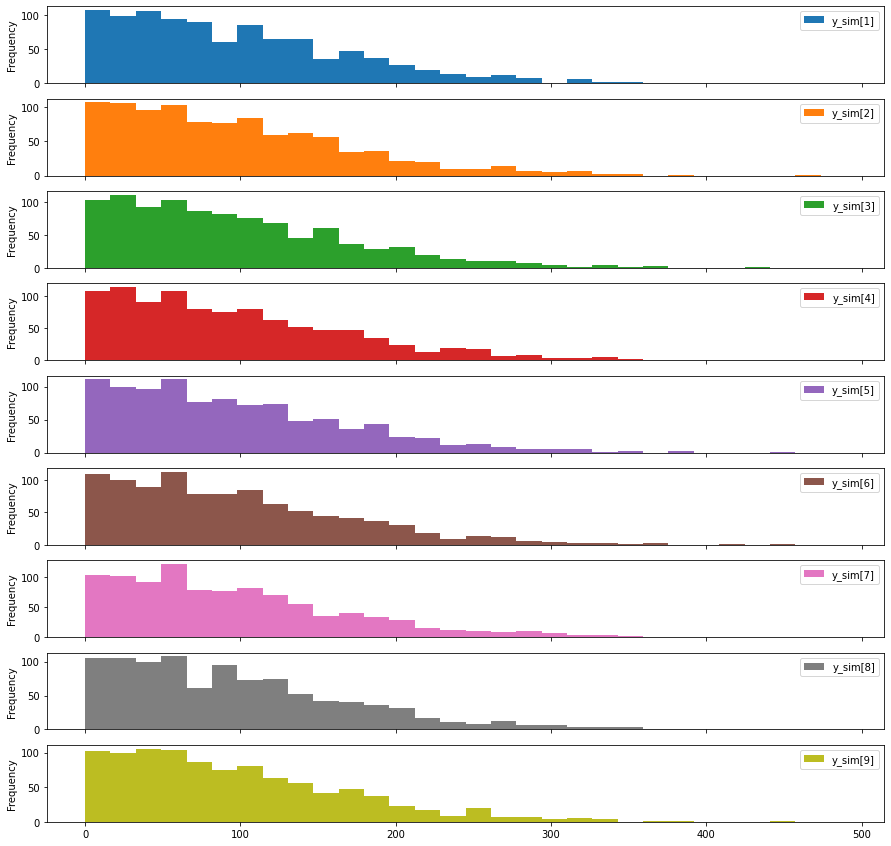

In [3]:
Lambda = df['lambda']
Lambda.plot.hist(bins=30)
plt.show()

df2 = df.drop(df.columns[0:3],axis=1)
df2.plot.hist(subplots=True, bins=30, figsize=(15,15))
plt.show()

## Excercise 2 - constraints on the data

In [4]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

# With seting y=[0,2], we can see range errors, when we change to y=[0,1], results will be correct

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


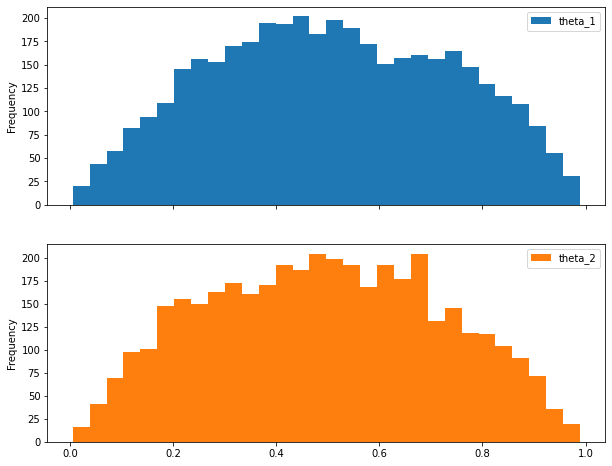

In [5]:
theta_1 = samp_bern1.stan_variable('theta')
theta_2 = samp_bern2.stan_variable('theta')

df = pd.DataFrame({'theta_1': theta_1, 'theta_2': theta_2})
df.plot.hist(subplots=True, bins=30, figsize=(10,8))
plt.show()

## Excercise 3 - Constraints on parameters


### Unconstrained parameters

In [6]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▏         | 00:00 Status



chain 1 |██▊       | 00:00 Iteration: 1700 / 7000 [ 24%]  (Sampling)




chain 1 |███▎      | 00:00 Iteration: 2100 / 7000 [ 30%]  (Sampling)

chain 1 |███▊      | 00:01 Iteration: 2400 / 7000 [ 34%]  (Sampling)


chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)

chain 1 |████▍     | 00:01 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |████▋     | 00:01 Iteration: 3100 / 7000 [ 44%]  (Sampling)

chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▎    | 00:02 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▌    | 00:02 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▊    | 00:02 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████    | 00:02 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00:02 Iteration: 4300 / 7000 [ 6


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/samples/code_4-20230320173249_1.csv, /home/samples/code_4-20230320173249_2.csv, /home/samples/code_4-20230320173249_3.csv, /home/samples/code_4-20230320173249_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

(6000, 4, 8)


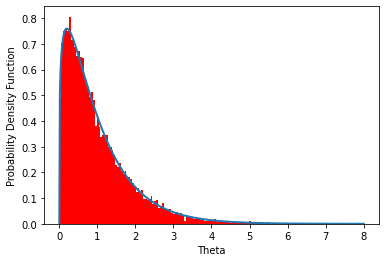

In [30]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

print(out_gamma1.draws().shape)

plt.plot(xs, pdfs, linewidth=2)
plt.hist(out_gamma1.draws().reshape(6000*4,8)[:,-1], density=True, bins=160, color='r')

plt.gca().set_xlabel("Theta")
plt.gca().set_ylabel("Probability Density Function")

plt.show()

### Constrained parameter

In [8]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |██▊       | 00:00 Iteration: 1700 / 7000 [ 24%]  (Sampling)

chain 1 |███▎      | 00:00 Iteration: 2100 / 7000 [ 30%]  (Sampling)


chain 1 |███▊      | 00:01 Iteration: 2400 / 7000 [ 34%]  (Sampling)

chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▍     | 00:01 Iteration: 2900 / 7000 [ 41%]  (Sampling)

chain 1 |████▋     | 00:01 Iteration: 3100 / 7000 [ 44%]  (Sampling)
chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▎    | 00:01 Iteration: 3500 / 7000 [ 50%]  (Sampling)

chain 1 |█████▌    | 00:02 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▊    | 00:02 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████    | 00:02 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00:02 Iteration: 4300 / 7000 [ 61%]  (S


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/samples/code_5-20230320173255_1.csv, /home/samples/code_5-20230320173255_2.csv, /home/samples/code_5-20230320173255_3.csv, /home/samples/code_5-20230320173255_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

(6000, 4, 8)


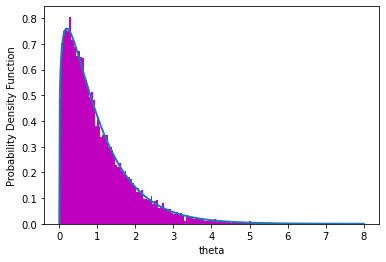

In [34]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

print(out_gamma1.draws().shape)

plt.plot(xs, pdfs, linewidth=2)

plt.hist(out_gamma1.draws().reshape(6000*4,8)[:,-1], density=True, bins=160, color='m')

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 - Selection of parameters using equation solving

In [10]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,3.49402


## Excercise 5 - different methods of defining models

In [11]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 15082000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


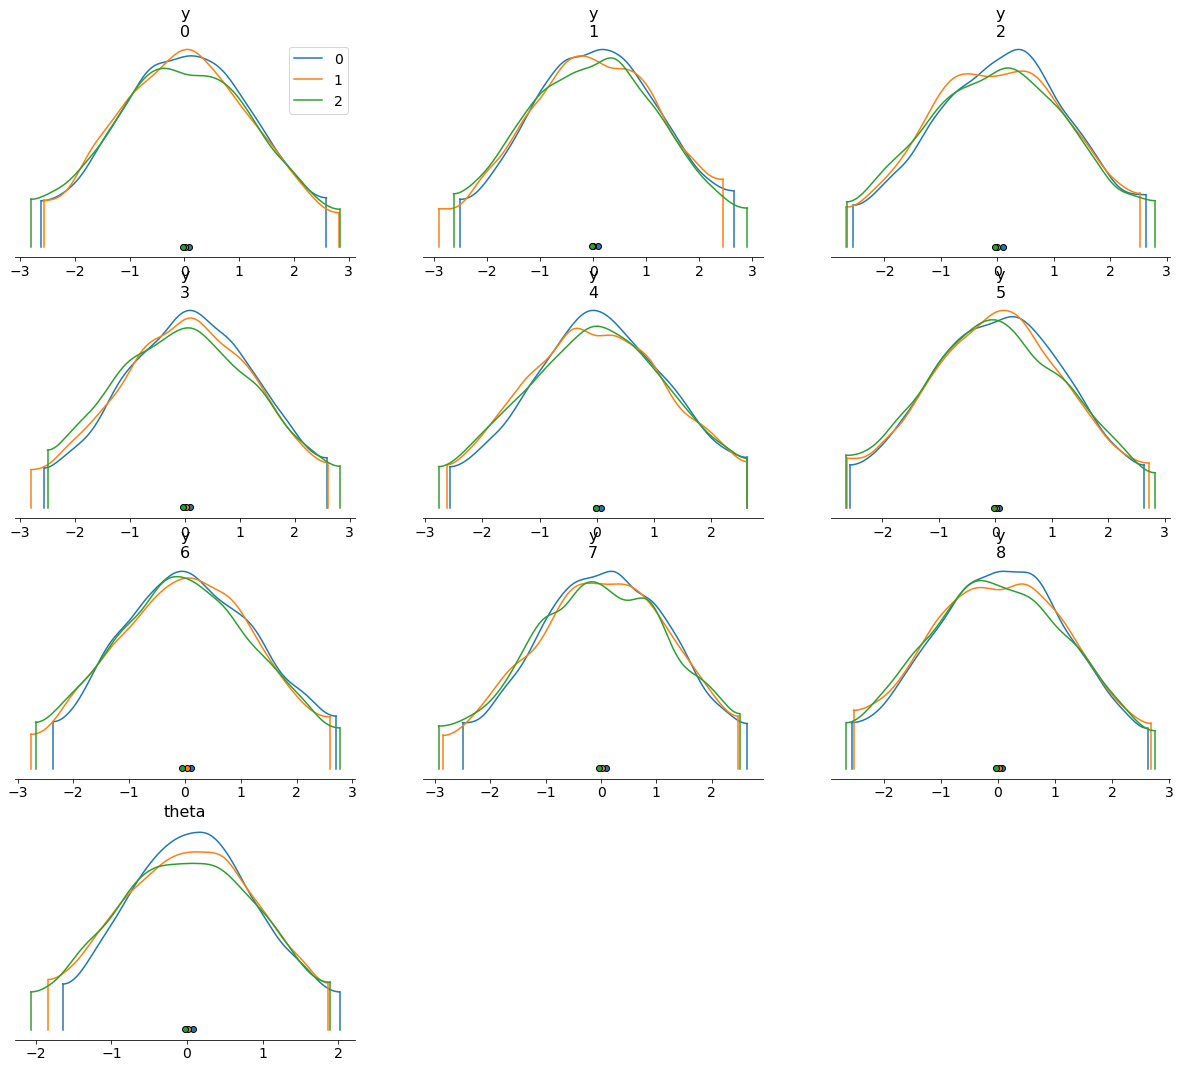

In [12]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing


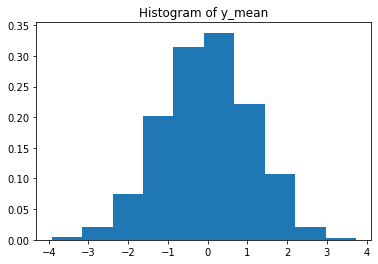

In [17]:
model_gq = CmdStanModel(stan_file='code_10.stan')

mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample=result_3)

plt.hist(mean_of_y.draws_pd()['mean_y'], density=True)
plt.title('Histogram of y_mean')
plt.show()